<a href="https://colab.research.google.com/github/GauriMittal24/AI-lab-assignments/blob/main/Personality_Prediction_converting_ann_tocnnipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

# Upload the dataset folder from your local machine
uploaded = files.upload()

Saving archive (3).zip to archive (3).zip


In [ ]:
import zipfile

# Specify the path to the zip file
zip_path = 'archive (3).zip'

# Specify the directory where you want to extract the contents
extract_path = 'sample_data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
import os

# List the contents of the current directory
os.listdir()

['.config', 'sample_data', 'archive (3).zip']

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import missingno as msno
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import levene
from scipy.stats import shapiro
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import scale
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D
from tensorflow.keras.models import Model
from keras import layers
import tensorflow as tf
import os
import os.path
from pathlib import Path
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical



<ipython-input-5-d8ff13dcb642>:14: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [ ]:
filterwarnings("ignore", category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)
filterwarnings("ignore", category=UserWarning)

In [ ]:
dataTrain = Path("/content/sample_data/dataset/training_set")


In [ ]:
filepath = list(dataTrain.glob(r"**/*.jpg"))

In [ ]:
len(filepath)


126

In [ ]:
print(filepath[10])


/content/sample_data/dataset/training_set/Neuroticism/IMG_20200215_173728.jpg


In [ ]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepath))

DATA FOR VISUALIZATION


In [ ]:
filepath = pd.Series(filepath, name='Filepath').astype(str)


In [ ]:
print(labels[60])


Openness


In [ ]:

labels = pd.Series(labels,name="Labels")


In [ ]:
ListA = []
for i in filepath:
    image = cv2.imread(i,0)
    ListA.append(np.array(image,"uint8"))

In [ ]:
ListA = pd.Series(ListA,name="Array")

In [ ]:
MainData = pd.concat([ListA,labels],axis=1)

In [ ]:
data = MainData.copy() # to protect main data




In [ ]:
print(data["Labels"].value_counts())

Openness             50
Neuroticism          24
Agreeableness        24
Conscientiousness    22
Extraversion          6
Name: Labels, dtype: int64


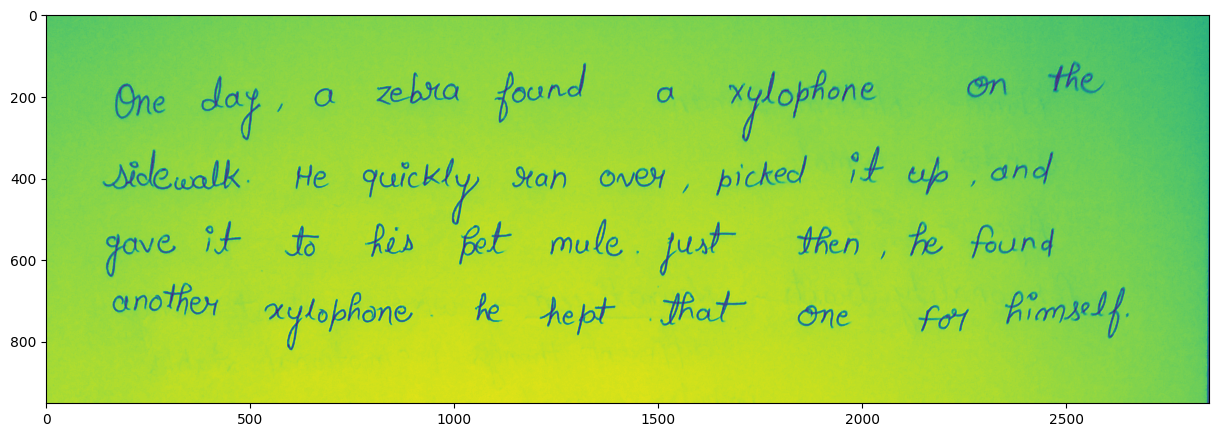

In [ ]:
figure = plt.figure(figsize=(15,8))
plt.imshow(data["Array"][10])

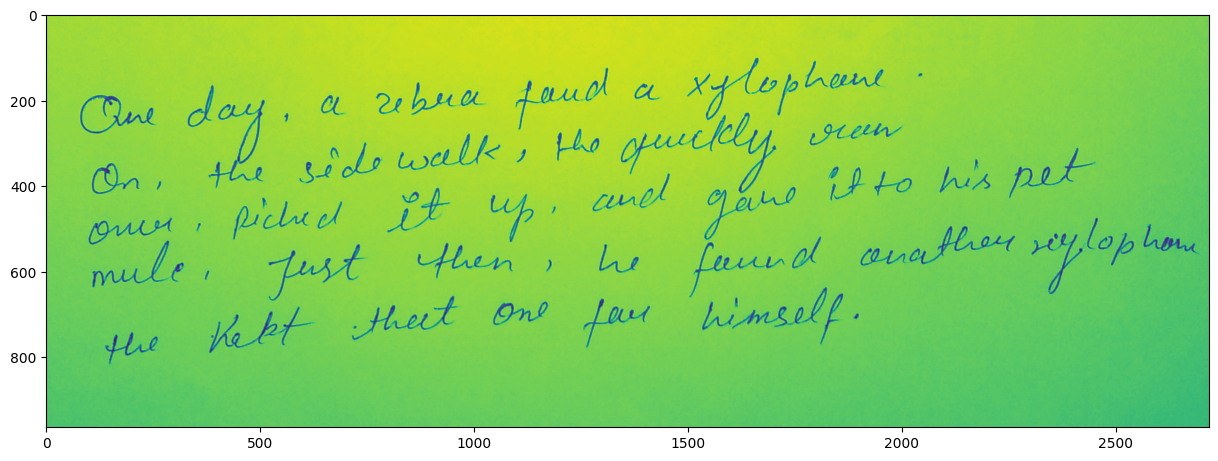

In [ ]:
figure = plt.figure(figsize=(15,8))
plt.imshow(data["Array"][5])

In [ ]:

print(data.head())

                                               Array       Labels
0  [[127, 125, 128, 131, 130, 124, 124, 121, 115,...  Neuroticism
1  [[132, 123, 133, 129, 128, 128, 133, 129, 132,...  Neuroticism
2  [[132, 130, 130, 101, 121, 130, 130, 127, 133,...  Neuroticism
3  [[188, 186, 187, 188, 188, 187, 186, 185, 187,...  Neuroticism
4  [[166, 170, 170, 169, 172, 170, 167, 168, 168,...  Neuroticism


DATA FOR MODEL



DATA CONCAT¶


In [ ]:
SecondData = pd.concat([filepath,labels],axis=1) # CREATING NEW DATA TO PROTECT MAIN DATA

In [ ]:
print(SecondData.head())  # GENERAL INFO

                                            Filepath       Labels
0  /content/sample_data/dataset/training_set/Neur...  Neuroticism
1  /content/sample_data/dataset/training_set/Neur...  Neuroticism
2  /content/sample_data/dataset/training_set/Neur...  Neuroticism
3  /content/sample_data/dataset/training_set/Neur...  Neuroticism
4  /content/sample_data/dataset/training_set/Neur...  Neuroticism



X & Y FOR MODEL

In [ ]:

x = SecondData["Filepath"]
y = SecondData["Labels"]

In [ ]:
encode = LabelEncoder()

In [ ]:

x = encode.fit_transform(x)

In [ ]:
print(x)

[ 55  62  70  52  63  65  59  53  68  75  72  71  67  58  54  57  64  66
  60  73  69  56  61  74 118  76 107 124 101  92  84  99 111  81 122  88
 123 120 110  91 103  78 113  79 104 125 106 102  82  85 117  98  97 121
  86 105  96  95 116  77  87  93 114  80 115  94 109 112 119  90  83 108
 100  89  48  50  47  49  46  51   0  14   2  15  19  20   7   8  11  21
  18   9  16  13   4   3   6   1  10  12  17  23  22   5  33  32  25  35
  45  26  44  30  28  34  40  43  42  37  36  31  38  39  27  41  29  24]


In [ ]:
y = encode.fit_transform(y)

In [ ]:
print(y)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:

print(x.shape)

(126,)


In [ ]:
print(y.shape)

(126,)


In [ ]:
x = np.asarray(x).astype("float32")
x = x.reshape(126,1,1)

In [ ]:
y = np.asarray(y).astype("float32")
y = y.reshape(126,1,1)




In [ ]:
print(len(x))


126


In [ ]:
print(len(y))

126


SPLITTING TRAIN & TEST

In [ ]:

xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.2,random_state=42)

# One-hot encode the labels
yTrain = to_categorical(yTrain, num_classes=5)
yTest = to_categorical(yTest, num_classes=5)


In [ ]:
yTrain = yTrain.reshape(-1, 5)
yTest = yTest.reshape(-1, 5)

In [ ]:
 print(xTrain.shape)# CHECKING SHAPE

(100, 1, 1)


In [ ]:
print(xTest.shape) # CHECKING SHAPE

(26, 1, 1)


In [ ]:
print(yTrain.shape) # CHECKING SHAPE

(100, 5)


In [ ]:
print(yTest.shape) # CHECKING SHAPE

(26, 5)


In [ ]:

import cv2

desired_height = 126
desired_width = 126

# Loop through and resize images
resized_xTrain = []
for img in xTrain:
    resized_img = cv2.resize(img, (desired_width, desired_height))
    resized_xTrain.append(resized_img)

resized_xTest = []
for img in xTest:
    resized_img = cv2.resize(img, (desired_width, desired_height))
    resized_xTest.append(resized_img)

# Convert the lists to NumPy arrays
xTrain = np.array(resized_xTrain)
xTest = np.array(resized_xTest)


In [ ]:



# Convert grayscale images to pseudo-RGB and reshape them
xTrain_rgb = np.repeat(xTrain, 3, axis=-1)
xTest_rgb = np.repeat(xTest, 3, axis=-1)

# Reshape the RGB images
xTrain_rgb = xTrain_rgb.reshape(-1, desired_height, desired_width, 3)
xTest_rgb = xTest_rgb.reshape(-1, desired_height, desired_width, 3)

# Now, xTrain_rgb and xTest_rgb can be used with models like VGG16

In [ ]:

print(xTrain_rgb.shape)

(100, 126, 126, 3)


In [ ]:

print(xTest_rgb.shape)

(26, 126, 126, 3)


CNN Model

In [ ]:
num_classes=5
# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(desired_height, desired_width, 3))

# Freeze the convolutional layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False
    #Add your custom classification layers on top of the base model
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)
# Create the final model
model = Model(inputs=base_model.input, outputs=output)
# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
xTrain_rgb, xTest_rgb, yTrain, yTest = train_test_split(xTrain_rgb, yTrain, test_size=0.2, random_state=42)


58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
# Train the CNN model
MainModel= model.fit(xTrain_rgb, yTrain, epochs=30, batch_size=5, validation_data=(xTest_rgb, yTest))

Epoch 1/30
16/16 [==============================] - 12s 745ms/step - loss: 0.3689 - accuracy: 0.8375 - val_loss: 0.3088 - val_accuracy: 0.8000
Epoch 2/30
16/16 [==============================] - 11s 713ms/step - loss: 0.3676 - accuracy: 0.8625 - val_loss: 0.3085 - val_accuracy: 0.9000
Epoch 3/30
16/16 [==============================] - 12s 745ms/step - loss: 0.3422 - accuracy: 0.8375 - val_loss: 0.3726 - val_accuracy: 0.8500
Epoch 4/30
16/16 [==============================] - 11s 720ms/step - loss: 0.2767 - accuracy: 0.9375 - val_loss: 0.3081 - val_accuracy: 0.8500
Epoch 5/30
16/16 [==============================] - 11s 718ms/step - loss: 0.3110 - accuracy: 0.9000 - val_loss: 0.3002 - val_accuracy: 0.8500
Epoch 6/30
16/16 [==============================] - 11s 717ms/step - loss: 0.3272 - accuracy: 0.8875 - val_loss: 0.2604 - val_accuracy: 0.8500
Epoch 7/30
16/16 [==============================] - 11s 727ms/step - loss: 0.3155 - accuracy: 0.8750 - val_loss: 0.2524 - val_accuracy: 0.8500

In [ ]:
result_Model = model.evaluate(xTest_rgb, yTest)

1/1 [==============================] - 3s 3s/step - loss: 0.2108 - accuracy: 0.9500


In [ ]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 126, 126, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 126, 126, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 126, 126, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 63, 63, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 63, 63, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 63, 63, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 31, 31, 128)       0     

In [ ]:

HistoryDict = MainModel.history

val_losses = HistoryDict["val_loss"]
val_acc = HistoryDict["val_accuracy"]
acc = HistoryDict["accuracy"]
losses = HistoryDict["loss"]
epochs = range(1,len(val_losses)+1)

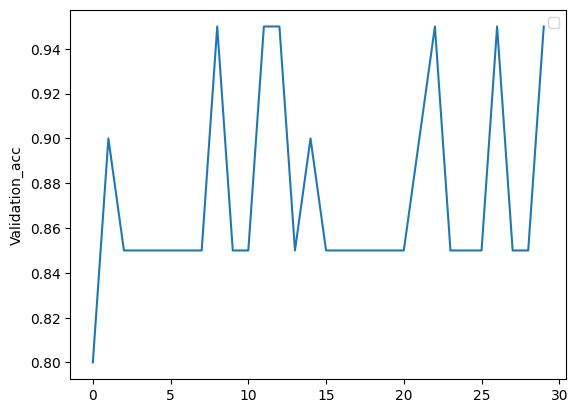

In [ ]:
plt.plot(MainModel.history["val_accuracy"])
plt.ylabel("Validation_acc")
plt.legend()
plt.show()

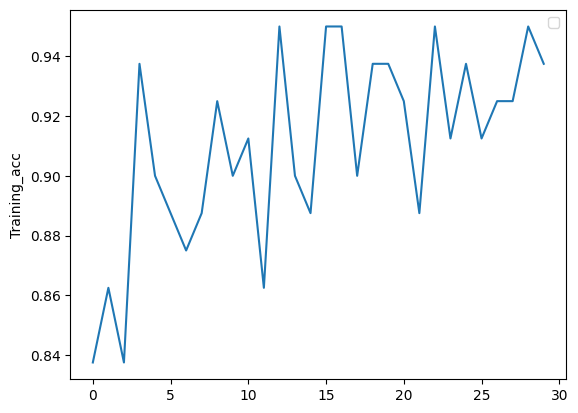

In [ ]:
plt.plot(MainModel.history["accuracy"])
plt.ylabel("Training_acc")
plt.legend()
plt.show()


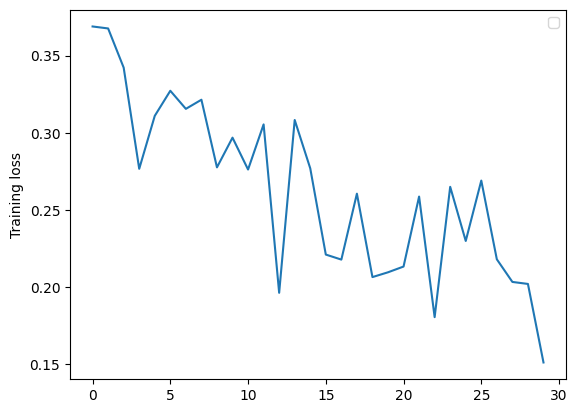

In [ ]:
plt.plot(MainModel.history["loss"])
plt.ylabel("Training loss")
plt.legend()
plt.show()


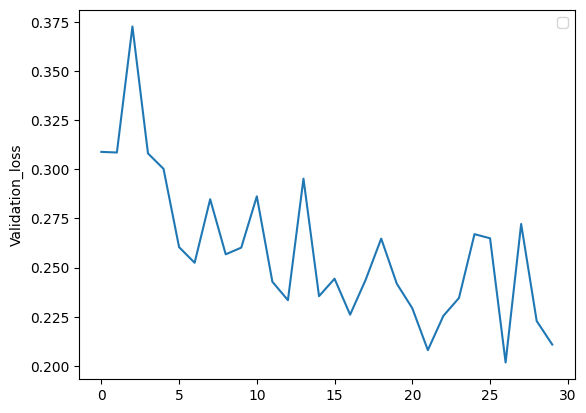

In [ ]:
plt.plot(MainModel.history["val_loss"])
plt.ylabel("Validation_loss")
plt.legend()
plt.show()


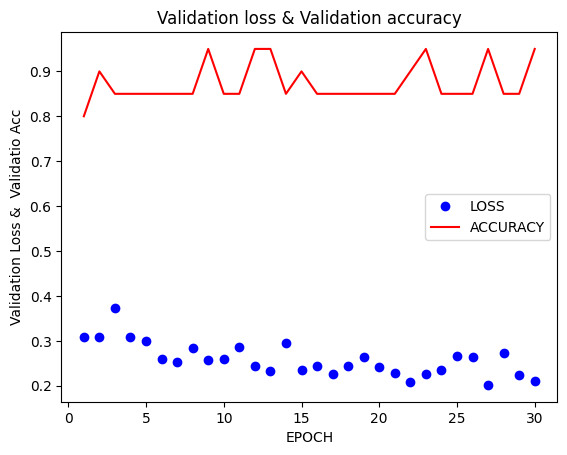

In [ ]:
plt.plot(epochs,val_losses,"bo",label="LOSS")
plt.plot(epochs,val_acc,"r",label="ACCURACY")
plt.title("Validation loss & Validation accuracy")
plt.xlabel("EPOCH")
plt.ylabel("Validation Loss &  Validatio Acc")
plt.legend()
plt.show()

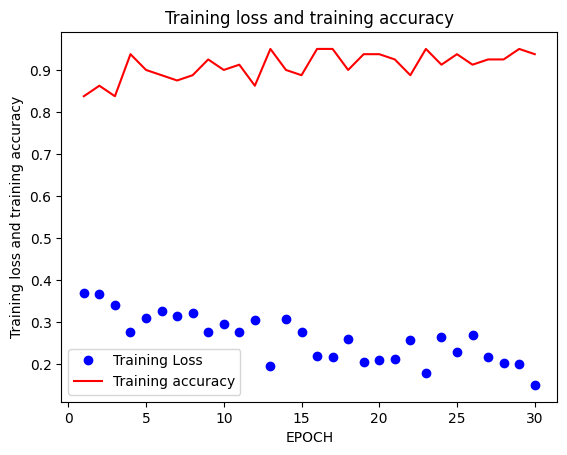

In [ ]:
plt.plot(epochs,losses,"bo",label="Training Loss")
plt.plot(epochs,acc,"r",label="Training accuracy")
plt.title("Training loss and training accuracy")
plt.xlabel("EPOCH")
plt.ylabel("Training loss and training accuracy")
plt.legend()
plt.show()

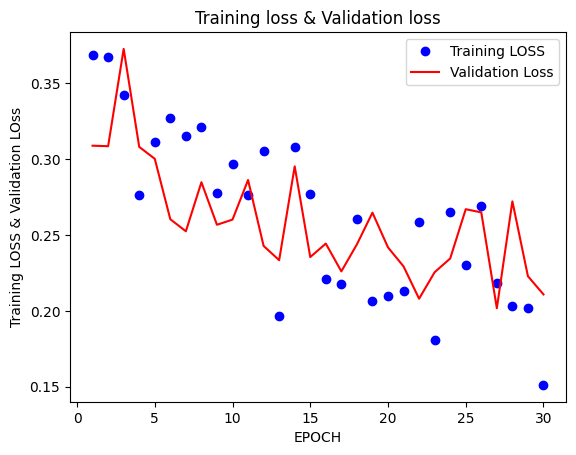

In [ ]:
plt.plot(epochs,losses,"bo",label="Training LOSS")
plt.plot(epochs,val_losses,"r",label="Validation Loss")
plt.title("Training loss & Validation loss")
plt.xlabel("EPOCH")
plt.ylabel("Training LOSS & Validation LOss")
plt.legend()
plt.show()

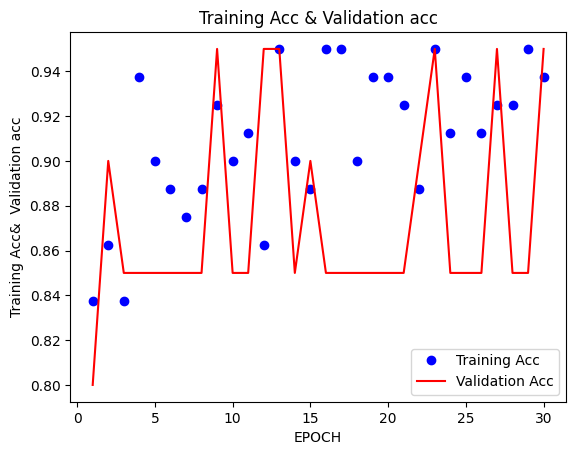

In [ ]:
plt.plot(epochs,acc,"bo",label="Training Acc")
plt.plot(epochs,val_acc,"r",label="Validation Acc")
plt.title("Training Acc & Validation acc")
plt.xlabel("EPOCH")
plt.ylabel("Training Acc&  Validation acc")
plt.legend()
plt.show()